In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import json

In [2]:
params = {
    "type": str(5),
    "method_type": str(2),
    "phi": str(3),
    "v": str(0),
    "nu": str(100),
    "l": str(1),
    "a": str(-0.1),
    "from": str(0),
    "to": str(1000),
    "delta": str(0.001),
    "output": "output_k.txt",
}

In [3]:
params_file = open("params_file.json", "w")
json.dump(params, params_file)
params_file.close()
subprocess.call(["../../facultative_cpp/cpp_7_week/week_7/week_7/main", "params_file.json"])
solution = np.loadtxt(params["output"]).transpose()

<IPython.core.display.Javascript object>


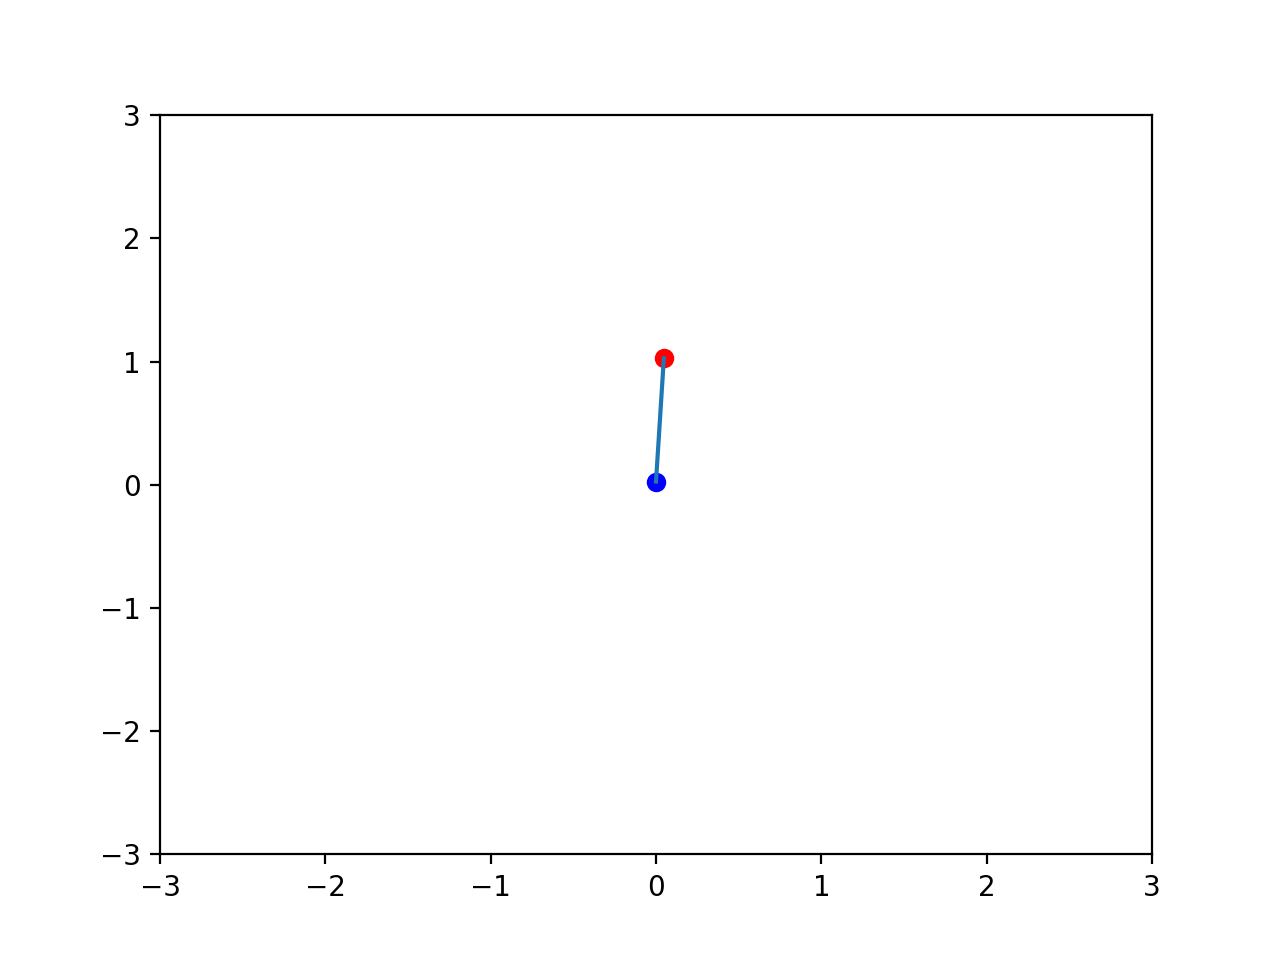

In [4]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation

fig, ax = plt.subplots()

a = solution[0] * 0
b = float(params["a"]) * np.cos(solution[0] * float(params["nu"]))


aa = float(params["l"]) * np.sin(solution[1])
bb = float(params["a"]) * np.cos(solution[0] * float(params["nu"])) - float(params["l"]) * np.cos(solution[1])


ax = plt.axis([-3,3,-3,3])

redDot, = plt.plot(aa[0], bb[0], 'ro')

blueDot, = plt.plot(a[0], b[0], 'bo')

lines, = plt.plot([a[0], aa[0]], [b[0], bb[0]])


def animate(i):
    lines.set_data([a[i], aa[i]], [b[i], bb[i]])
    redDot.set_data(aa[i], bb[i])
    blueDot.set_data(a[i], b[i])
    
    
    return (redDot, blueDot)


myAnimation = FuncAnimation(fig, animate, interval=1, blit=True, repeat=True)
plt.show()